<a href="https://colab.research.google.com/github/Janvithakur/AI-and-ML/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [5]:
df = df.drop(columns=['deck', 'embark_town'])


In [9]:
# 📊 Fill Missing Values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df.dropna(subset=['embarked'], inplace=True)

<ipython-input-9-8fa1d9394897>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-9-8fa1d9394897>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [10]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [11]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

In [12]:
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

In [13]:
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

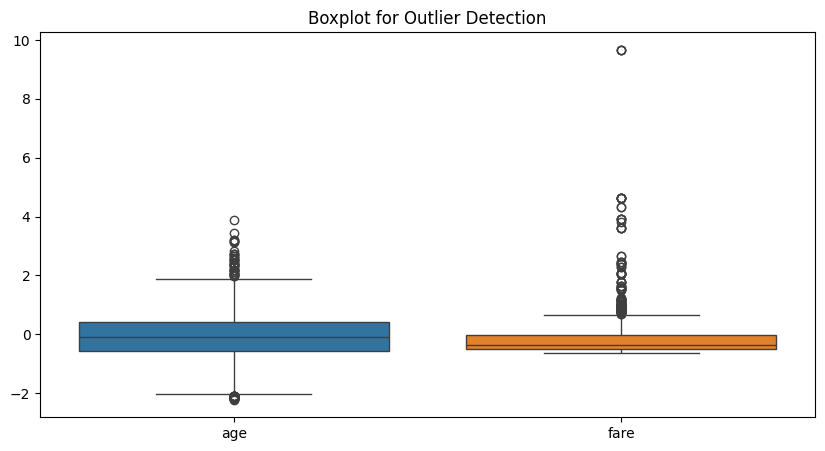

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['age', 'fare']])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [15]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['fare'] < (Q1 - 1.5 * IQR)) | (df['fare'] > (Q3 + 1.5 * IQR)))]


In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,embarked_Q,embarked_S
0,0,3,1,-0.565736,1,0,-0.502445,Third,man,True,no,False,False,True
2,1,3,0,-0.258337,0,0,-0.488854,Third,woman,False,yes,True,False,True
3,1,1,0,0.433312,1,0,0.420730,First,woman,False,yes,False,False,True
4,0,3,1,0.433312,0,0,-0.486337,Third,man,True,no,True,False,True
5,0,3,1,-0.104637,0,0,-0.478116,Third,man,True,no,True,True,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    775 non-null    int64   
 1   pclass      775 non-null    int64   
 2   sex         775 non-null    int64   
 3   age         775 non-null    float64 
 4   sibsp       775 non-null    int64   
 5   parch       775 non-null    int64   
 6   fare        775 non-null    float64 
 7   class       775 non-null    category
 8   who         775 non-null    object  
 9   adult_male  775 non-null    bool    
 10  alive       775 non-null    object  
 11  alone       775 non-null    bool    
 12  embarked_Q  775 non-null    bool    
 13  embarked_S  775 non-null    bool    
dtypes: bool(4), category(1), float64(2), int64(5), object(2)
memory usage: 64.5+ KB
